# Informações Relevantes sobre os dados

Esse *dataset* foi disponibilizado publicamente no site da UCI Machine Learning Repository, disponível em: <http://archive.ics.uci.edu/ml/datasets/Bank+Marketing>. 

Os dados foram coletados do Banco de Portugal, em: <https://www.bportugal.pt/estatisticasweb>


# Variáveis Analisadas

### Características dos clientes:

1 - [idade] age (numeric)

2 - [emprego] job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

3 - [estado_civil] marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

4 - [educação] education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

5 - [inadimplência] default: has credit in default? (categorical: "no","yes","unknown")

6 - [empréstimo_imobiliario] housing: has housing loan? (categorical: "no","yes","unknown")

7 - [empréstimo]: has personal loan? (categorical: "no","yes","unknown")

### Último contato feito:

8 - [forma_contato] contact: contact communication type (categorical: "cellular","telephone") 

9 - [mês_contato] month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

10 - [dia_contato] day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

11 - [duração_contato] duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### Outros atributos do cliente na campanha:

12 - [num_contatos] campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - [dias_ultimo_contato] pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - [contatos_anteriores] previous: number of contacts performed before this campaign and for this client (numeric)

15 - [resultado_anterior] poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

### Contexto socioeconômico dos clientes:

16 - [indice_desemprego] emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - [CPI] cons.price.idx: consumer price index - monthly indicator (numeric)     

18 - [CCI] cons.conf.idx: consumer confidence index - monthly indicator (numeric)  

19 - [Euribor] euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - [num_empregados] nr.employed: number of employees - quarterly indicator (numeric)

### Variável-Alvo:

21 - [resultado] y: has the client subscribed a term deposit? (binary: "yes","no")

# Valores Faltantes

Todos os valores faltantes foram imputados como "unknown".

# Importação de Dados

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
warnings.filterwarnings(action='ignore')

In [2]:
dados = pd.read_csv("../dados/bank-additional-full.csv", sep=";")

dados = dados.rename(columns={
    "age":"idade",
    "job":"emprego",
    "marital":"estado_civil",
    "education":"educacao",
    "default":"inadimplencia",
    "housing":"emprestimo_imobiliario",
    "loan":"emprestimo",
    "contact":"forma_contato",
    "month":"mes_contato",
    "day_of_week":"dia_contato",
    "duration":"duracao_contato",
    "campaign":"num_contatos",
    "pdays":"dias_ultimo_contato",
    "previous":"contatos_anteriores",
    "poutcome":"resultado_anterior",
    "emp.var.rate":"indice_desemprego",
    "cons.price.idx":"CPI",
    "cons.conf.idx":"CCI",
    "euribor3m":"Euribor",
    "nr.employed":"num_empregados",
    "y":"resultado"
})
dados.head()

,idade,emprego,estado_civil,educacao,inadimplencia,emprestimo_imobiliario,emprestimo,forma_contato,mes_contato,dia_contato,...,num_contatos,dias_ultimo_contato,contatos_anteriores,resultado_anterior,indice_desemprego,CPI,CCI,Euribor,num_empregados,resultado
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Limpeza de Dados

Devemos verificar:
* estrutura
* granularidade
* escopo
* temporalidade
* corretude

Operações:
* Limpeza de NAs
* padronizações
* tipagem

## Lidando com os NA's

Os dados faltantes das colunas de "Características dos Clientes" foram imputados com a palavra "unknown". Além disso, os valores faltantes da coluna "pdays" foram imputados com "999". 

Para tratá-los, precisamos converter todos os dados faltantes para o formato NaN, de forma a facilitar sua transformação.

In [3]:
df = dados.copy()
df = df.apply(lambda x: x.replace('unknown', np.nan))
df["dias_ultimo_contato"] = df["dias_ultimo_contato"].replace(999, np.nan)

In [4]:
df.info() #

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   idade                   41188 non-null  int64  
 1   emprego                 40858 non-null  object 
 2   estado_civil            41108 non-null  object 
 3   educacao                39457 non-null  object 
 4   inadimplencia           32591 non-null  object 
 5   emprestimo_imobiliario  40198 non-null  object 
 6   emprestimo              40198 non-null  object 
 7   forma_contato           41188 non-null  object 
 8   mes_contato             41188 non-null  object 
 9   dia_contato             41188 non-null  object 
 10  duracao_contato         41188 non-null  int64  
 11  num_contatos            41188 non-null  int64  
 12  dias_ultimo_contato     1515 non-null   float64
 13  contatos_anteriores     41188 non-null  int64  
 14  resultado_anterior      41188 non-null

Podemos observar que há valores faltantes nas colunas "inadimplência", "educação", "emprego", "empréstomo_imobiliário", "empréstimo" e "dias_último_contato". Vamos verificar o quanto isso representa do total de amostras, individualmente.

In [5]:
tmp = df[["inadimplencia", "educacao", "emprego", "emprestimo_imobiliario", "emprestimo", "dias_ultimo_contato"]]
tmp.isna().sum().sort_values(ascending=False)/len(df)

dias_ultimo_contato       0.963217
inadimplencia             0.208726
educacao                  0.042027
emprestimo_imobiliario    0.024036
emprestimo                0.024036
emprego                   0.008012
dtype: float64

As colunas que contém +5% de NA's em relação à quantidade total de observações são: "default" e "pdays". Vamos verificar a correlação entre elas e o alvo. Caso não seja significante (+5%), optaremos por apagá-las assumindo que não haverá perda de informação.

Já as outras colunas contém uma baixa quantidade de dados faltantes, por isso consideramos razoável remover todas as linhas que contenham pelo menos um dado faltante.

In [6]:
tmp = df[["dias_ultimo_contato","resultado"]]
tmp = tmp.apply(lambda x: x.replace('no', 0))
tmp = tmp.apply(lambda x: x.replace('yes', 1))

print("correlação dias_ultimo_contato-resultado:", tmp.corr()["resultado"][0].round(2))

tmp = df[["inadimplencia","resultado"]]
tmp = tmp.apply(lambda x: x.replace('no', 0))
tmp = tmp.apply(lambda x: x.replace('yes', 1))

print("correlação inadimplencia-resultado:", tmp.corr()["resultado"][0].round(2))

df.drop(["inadimplencia", "dias_ultimo_contato"], axis=1, inplace=True) # apaga as colunas
df.dropna(inplace=True) # apaga os NA's das linhas restantes

correlação dias_ultimo_contato-resultado: -0.04
correlação inadimplencia-resultado: -0.0


Vamos agora verificar a maneira como os dados estão descritos.

O primeiro ponto a se considerar é de que o pandas realiza a tipagem das colunas de forma automática. Neste caso, dado que o csv considera certos dados faltantes como "unknown", todos os dados das colunas que contém NA's seriam convertidos para o tipo "object", ou seja, não numérico. Como as únicas colunas que continham NA's são categóricas não ordinais, nenhuma tipagem foi feita de maneira errada. 

A partir da função `df.info` (contida na célula acima) podemos verificar que as variáveis que contém números são: 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'. Ao visualizá-las, podemos confirmar o que foi constatado. 

In [7]:
print("Rótulos das colunas numéricas: ", list(df.columns))
df.iloc[:, 9:19].head() # Colunas numéricas
# fazer analises

Rótulos das colunas numéricas:  ['idade', 'emprego', 'estado_civil', 'educacao', 'emprestimo_imobiliario', 'emprestimo', 'forma_contato', 'mes_contato', 'dia_contato', 'duracao_contato', 'num_contatos', 'contatos_anteriores', 'resultado_anterior', 'indice_desemprego', 'CPI', 'CCI', 'Euribor', 'num_empregados', 'resultado']


,duracao_contato,num_contatos,contatos_anteriores,resultado_anterior,indice_desemprego,CPI,CCI,Euribor,num_empregados,resultado
0,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Agora que verificamos a tipagem correta dos dados, podemos visualizar as estatísticas descritivas para dados categóricos (1) e numéricos (2).

In [8]:
df.describe(include="object") # (1) - Dados Categóricos

,emprego,estado_civil,educacao,emprestimo_imobiliario,emprestimo,forma_contato,mes_contato,dia_contato,resultado_anterior,resultado
count,38245,38245,38245,38245,38245,38245,38245,38245,38245,38245
unique,11,3,7,2,2,2,10,5,3,2
top,admin.,married,university.degree,yes,no,cellular,may,thu,nonexistent,no
freq,9937,23183,11821,20578,32286,24441,12794,8011,33066,33987


In [9]:
df.describe() # (2) - Dados Numéricos

,idade,duracao_contato,num_contatos,contatos_anteriores,indice_desemprego,CPI,CCI,Euribor,num_empregados
count,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000
mean,39.860871,258.207583,2.566662,0.170009,0.082861,93.570313,-40.541164,3.623298,5167.432566
std,10.289488,259.792638,2.767473,0.487169,1.565945,0.576367,4.623200,1.730226,71.760333
min,17.000000,0.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,43.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Testes de Hipótese

## 1) Diferença de médias (bootstrap) entre o estado civil, idade, classe social e educação

Text(0.5, 1.0, 'Aceitaram')

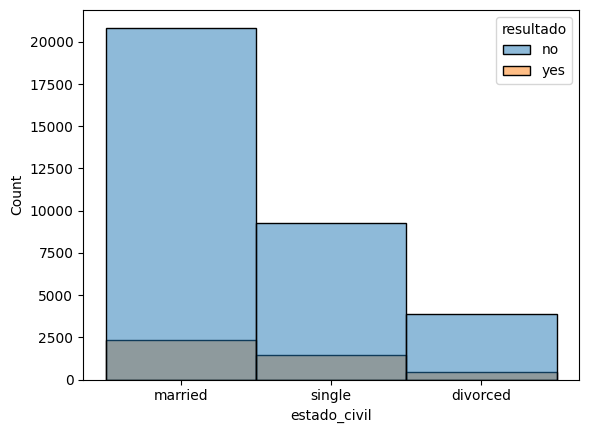

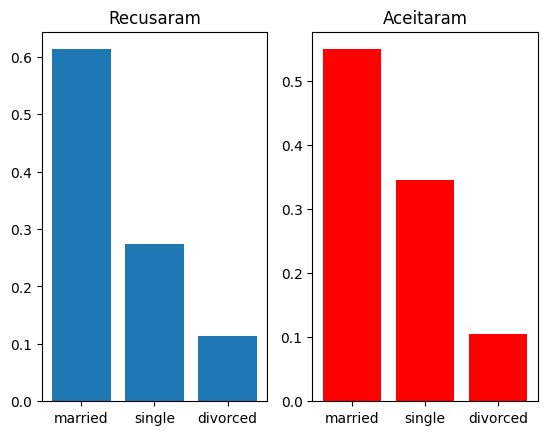

In [10]:
sns.histplot(df, x="estado_civil", hue="resultado")
tmp1 = df[df["resultado"] == 'no']["estado_civil"]
tmp2 = df[df["resultado"] == 'yes']["estado_civil"]
tmp1 = tmp1.value_counts()
tmp2 = tmp2.value_counts()
ind = tmp1.index.tolist()
tmp1 = tmp1/tmp1.sum() 
tmp2 = tmp2/tmp2.sum() 
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.bar(ind,tmp1)
ax1.set_title('Recusaram')
ax2.bar(ind, tmp2, color='r')
ax2.set_title('Aceitaram')


In [11]:
def bootstrap_diff_mean(vet_1, vet_2, n=1000):
    size1, size2 = len(vet_1), len(vet_2)
    values_diff = np.zeros(n)
    for i in range(n):
        np.random.seed(i)
        sample1 = np.random.choice(vet_1, size=size1, replace=True)
        sample2 = np.random.choice(vet_2, size=size2, replace=True)
        values_diff[i] = sample1.mean() - sample2.mean()
    
    pct_inf = np.percentile(values_diff, 2.5)
    pct_sup = np.percentile(values_diff, 97.5)

    return pct_inf.round(4), pct_sup.round(4)

In [13]:
tmp1 = df[df["estado_civil"] == 'married']
tmp1 = tmp1["resultado"]
tmp1 = np.where(tmp1 == "yes", 1, 0)

tmp2 = df[df["estado_civil"] != 'married']
tmp2 = tmp2["resultado"]
tmp2 = np.where(tmp2 == "yes", 1, 0)

print("Ambas as variáveis são vetores binários, tendo valor 1 se o aceitou a oferta e 0 caso contrário")
print("tmp1: Pessoas casadas")
print("tmp2: Pessoas não casadas")
print("Intervalo de confiança da diferença da taxa de aceitação de casados e não casados")
bootstrap_diff_mean(tmp1, tmp2)

Ambas as variáveis são vetores binários, tendo valor 1 se o aceitou a oferta e 0 caso contrário
tmp1: Pessoas casadas
tmp2: Pessoas não casadas
Intervalo de confiança da diferença da taxa de aceitação de casados e não casados


(-0.0326, -0.02)

Com base no intervalo de confiança acima, temos evidências para rejeitar a hipótese nula de que a chance de uma pessoa aleatória aceitar a proposta é a mesma se ela for casada ou não.<br>
Tendo em vista o intervalo negativo, a chance de alguém casado aceitar a proposta é menor do que a de uma pessoa não casada.<br>

Tal fato está em concordância com a observação de que o casamento é uma barreira adicional a campanha de marketing, pois mesmo que a campanha convença uma pessoa casada, isso pode não ser o bastante para vender o produto visto que os bens também dizem respeito ao cônjuge da pessoa. 

In [14]:
tmp1 = df[df["idade"] >= 40]
tmp1 = tmp1["resultado"]
tmp1 = np.where(tmp1 == "yes", 1, 0)
tmp2 = df[df["idade"] < 40]
tmp2 = tmp2["resultado"]
tmp2 = np.where(tmp2 == "yes", 1, 0)

print("Ambas as variáveis são vetores binários, tendo valor 1 se o aceitou a oferta e 0 caso contrário")
print("tmp1: Pessoas a partir de 40 anos")
print("tmp2: Pessoas com menos de 40 anos")
print("Intervalo de confiança da diferença da taxa de aceitação entre as faixas etárias")
bootstrap_diff_mean(tmp1, tmp2)

Ambas as variáveis são vetores binários, tendo valor 1 se o aceitou a oferta e 0 caso contrário
tmp1: Pessoas a partir de 40 anos
tmp2: Pessoas com menos de 40 anos
Intervalo de confiança da diferença da taxa de aceitação entre as faixas etárias


(-0.0151, -0.0023)

A média da idade dos participantes foi escolhida para particionar os dados em 2 grupos.<br>
O intervalo de confiança não contém 0, portanto, temos evidência para rejeitar a hipótese nula de que a chance de aceitar o depósito a prazo é a mesma estando acima ou abaixo da média do público alvo.

## 2) Avaliando o impacto do dia em que foi realizada a ligação no resultado da campanha.(Teste de Permutação)

In [15]:
def permutation_test(data, test_value, n_cases=1000):
    qt = []
    for i in range(n_cases):
        sample = data['dia_contato'].sample(frac=1,ignore_index=True)
        data.iloc[:,0] = sample
        
        day_mean = np.mean(data[data['dia_contato'] == 1]['resultado'])

        not_day_mean = np.mean(data[data['dia_contato'] == 0]['resultado'])

        diff = not_day_mean - day_mean
        qt.append(diff)
    IS = np.percentile(qt, 97.5)
    II = np.percentile(qt, 2.5)
    return qt,II,IS

Este teste de hipótese irá fazer a permutação na coluna de dia de contato, desassociando-o do sucesso ou não da campnha, assim podendo testar a diferença entre as médias de sucessos da campanha de marketing quando houve contato no dia passado por parâmetro e de sucesso nos dias que não são o passado, para verificar se existe uma diferença estatisticamente relevante que nos possa indicar um viés de sucesso com base no dia em que entrou-se em contato com o cliente.

In [16]:
days = ['mon','tue','wed','thu','fri']
for d in days:
    tmp_per = df[['dia_contato','resultado']].copy()

    tmp_per['resultado'] = np.where(tmp_per['resultado'] == 'yes',1,0)
    tmp_per['dia_contato'] = np.where(tmp_per['dia_contato'] == d,1,0)

    day_mean = np.mean(tmp_per[tmp_per['dia_contato'] == 1]['resultado'])

    not_day_mean = np.mean(tmp_per[tmp_per['dia_contato'] == 0]['resultado'])
    
    obs = not_day_mean - day_mean

    q, i, s = permutation_test(tmp_per.copy(), d)

    print(f"Dia: {d} - IC: ({np.round(i,2)},{np.round(s,2)}) - Mean: {np.round(np.mean(q),4)}")

Dia: mon - IC: (-0.01,0.01) - Mean: 0.0001
Dia: tue - IC: (-0.01,0.01) - Mean: 0.0
Dia: wed - IC: (-0.01,0.01) - Mean: -0.0001
Dia: thu - IC: (-0.01,0.01) - Mean: -0.0001
Dia: fri - IC: (-0.01,0.01) - Mean: -0.0001


Utilizando um Teste de Permutação simples, calculando a diferença entre as médias de sucessos em um dia especifico e as médias de sucessos quando não foi esse dia, para cada um dos dias, foi possível notar que todos os intervalos de confiança estão com o  cvalor 0 entre eles, indecando que não há uma evidência estatística razoável para se crer que há uma influência direta entre o dia que foi entrado em contato com o cliente e o sucesso ou não da campanha de marketing, aceitando-se assim a Hipótese Nula.

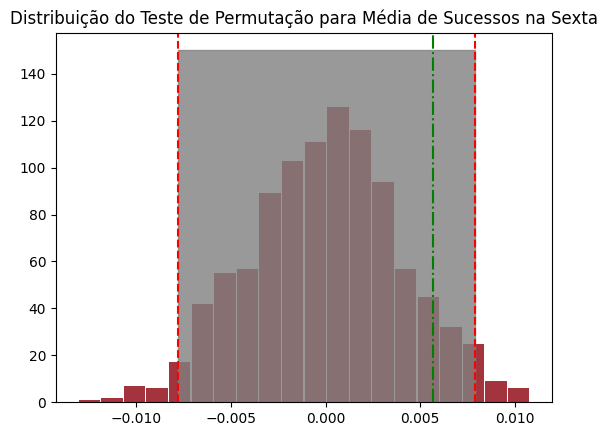

In [17]:
plt.title('Distribuição do Teste de Permutação para Média de Sucessos na Sexta')
plt.axvline(i,color='r',linestyle='--',label='df')
plt.axvline(s,color='r',linestyle='--')
plt.axvline(obs,color='g',linestyle='dashdot')
plt.hist(q,bins=20,rwidth=0.95,color='#A3333D')
plt.fill_between([i, s], 0, 150, color='grey', alpha=0.8)
plt.show()

## 3) Avaliando se o fato de uma pessoa ter contraído algum tipo de empréstimo é relacionado a uma maior proporção de aceites na campanha. 

In [18]:
''' 
    Tratamento do banco de dados antes de realizar o teste.
    As variáveis "emprestimo_imobiliario" e "emprestimo" foram convertidas em uma só variável. 
'''
tmp = df[["emprestimo_imobiliario", "emprestimo", "resultado"]]

loan = []
for i in range(len(tmp)):
    if tmp["emprestimo_imobiliario"].iloc[i] == 'yes' or tmp["emprestimo"].iloc[i] == 'yes':
        loan.append('yes')
    else:
        loan.append('no')

tmp["algum_emprestimo"] = pd.Series(loan)
tmp.drop(["emprestimo", "emprestimo_imobiliario"], axis=1, inplace=True)
tmp.dropna(inplace=True)
tmp.head(3)

,resultado,algum_emprestimo
0,no,no
1,no,no
2,no,yes


In [19]:
def bootstrap_diff_mean_3(vet_1, vet_2, n=1000):
    '''
    Cria teste de hipóteses por diferença de média (proporção de pessoas que contraíram algum empréstimo)
    entre os dois grupos (aceitaram e recusaram a campanha) assumindo uma significância de 5%

    Entrada: 
        vet_1 -> vetor contendo a situação de empréstimo das pessoas que recusaram a campanha (binário)
        vet_2 -> vetor contendo a situação de empréstimo das pessoas que aceitaram a campanha (binário)
    Saída:
        pct_inf -> limite inferior do intervalo de confiança não paramétrico obtido para n amostras 
        pct_sup -> limite superior do intervalo de confiança não paramétrico obtido para n amostras
        
    '''
    size1, size2 = len(vet_1), len(vet_2)
    values_diff = np.zeros(n)
    for i in range(n):
        np.random.seed(i)
    
        sample1 = np.random.choice(vet_1, size=size1, replace=True)
        sample2 = np.random.choice(vet_2, size=size2, replace=True)
        values_diff[i] = sample1.mean() - sample2.mean()
    
    pct_inf = np.percentile(values_diff, 2.5)
    pct_sup = np.percentile(values_diff, 97.5)

    return pct_inf.round(4), pct_sup.round(4), values_diff

In [20]:
tmp1 = tmp[tmp["resultado"] == 'no']["algum_emprestimo"]
tmp1 = np.where(tmp1 == "yes", 1, 0)

tmp2 = tmp[tmp["resultado"] == 'yes']["algum_emprestimo"]
tmp2 = np.where(tmp2 == "yes", 1, 0)

print("IC:", bootstrap_diff_mean_3(tmp1, tmp2)[:2]) # Inclui 0 então é possível explicar pela aleatoriedade

IC: (-0.0331, 0.0021)


O intervalo de confiança para a diferença de média entre os grupos inclui a possibilidade de a estatística ser igual a zero, o que significa que não é possível apontar diferença entre a distribuição da média da variável y (variável Bernoulli indicativa de sucesso no aceite da campanha) para grupos que contraíram pelo menos um tipo de empréstimo no momento em que foram contatados. 

In [21]:
tmp.value_counts()

resultado  algum_emprestimo
no         yes                 19663
           no                  13001
yes        yes                  1811
           no                   1126
Name: count, dtype: int64

Podemos notar que a proporção de pessoas com empréstimo em ambos os casos (resultado == "yes" ou resultado == "no") é bastante semelhante, um indicativo de que não há diferença na distribuição da variável "algum empréstimo" entre os dois grupos. 

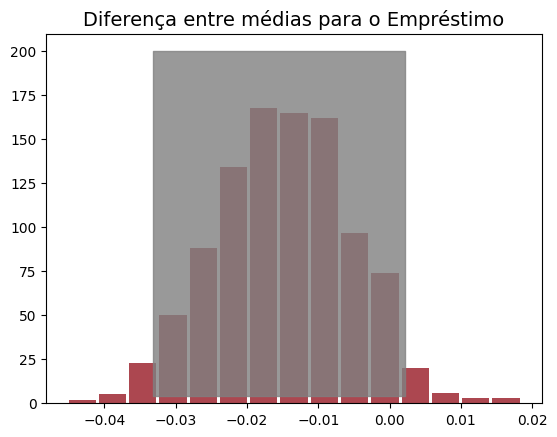

In [22]:
bootstrap = bootstrap_diff_mean_3(tmp1, tmp2)

plt.hist(bootstrap[2], color='#A3333D', alpha=0.9, density=False, bins=15, rwidth=0.9)
plt.title('Diferença entre médias para o Empréstimo', fontsize=14)
plt.fill_between([bootstrap[0], bootstrap[1]], 200, 4, color='grey', alpha=0.8)
fig.tight_layout()
plt.show()

Também é possível observar que a distribuição da diferença de médias entre as amostras aleatórias geradas pelo bootstrap segue uma distribuição normal, conforme comprovado pelo Teorema Central do Limite.

### 4) Avaliar se a amostra é desbalanceada em relação à quantidade de pessoas que aceitaram a campanha.

In [23]:
''' 
    Tratamento do banco de dados antes de realizar o teste.
    As variáveis "emprestimo_imobiliario" e "emprestimo" foram convertidas em uma só variável. 
'''
tmp = df[["emprestimo_imobiliario", "emprestimo", "resultado"]]

loan = []
for i in range(len(tmp)):
    if tmp["emprestimo_imobiliario"].iloc[i] == 'yes' or tmp["emprestimo"].iloc[i] == 'yes':
        loan.append('yes')
    else:
        loan.append('no')

tmp["algum_emprestimo"] = pd.Series(loan)
tmp.drop(["emprestimo", "emprestimo_imobiliario"], axis=1, inplace=True)
tmp.dropna(inplace=True)
tmp.head(3)

,resultado,algum_emprestimo
0,no,no
1,no,no
2,no,yes


#### Teste Hipótese 4

In [24]:
def classic_ic(vetor):
    '''
    Cria teste de hipóteses para a proporção de pessoas que aceitaram a campanha,
    assumindo uma significância de 5%

    Entrada: 
        vetor -> vetor contendo a informação de que a pessoa aceitou ou não a campanha (binário)
    Saída:
        pct_inf -> limite inferior do intervalo de confiança paramétrico obtido para a amostra
        pct_sup -> limite superior do intervalo de confiança paramétrico obtido para a amostra
    '''
    x_bar = np.mean(vetor) # p
    std_bar = np.std(vetor) # p(1-p)
    n = len(vetor)
    
    pct_inf = x_bar - (1.96*std_bar/(n**0.5))
    pct_sup = x_bar + (1.96*std_bar/(n**0.5))

    return pct_inf.round(4), pct_sup.round(4)

In [25]:
tmp3 = np.where(tmp["resultado"] == 'yes', 1, 0)

print("Intervalo de Confiança para a média populacional:", classic_ic(tmp3)) 
print("Média (Proporção) Amostral:", tmp3.mean().round(4))

Intervalo de Confiança para a média populacional: (0.0796, 0.0854)
Média (Proporção) Amostral: 0.0825


O valor de 50% não está incluído no intervalo de confiança para a distribuição real da média populacional $\mu$. Isso significa que o fato de a média da variável y ser de 8,25% é muito raro e não pode ser explicado pela aleatoriedade (caso em que a média é 50%). Outro fator a se analisar pode ser de que a seleção da amostra pode ter sido feita de forma enviesada, e por isso ela foi coletada de forma desbalanceada de uma forma que não pode ser explicada pela aleatoriedade.

In [26]:
print("Estatísticas Descritivas")
pd.Series(tmp3).describe()[:3].round(3)

Estatísticas Descritivas


count    35601.000
mean         0.082
std          0.275
dtype: float64

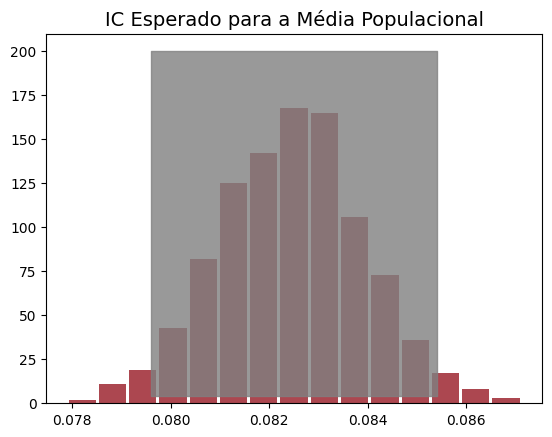

In [27]:
import numpy as np
rand_norm = np.random.normal(tmp3.mean(), tmp3.std()/(len(tmp3)**0.5), 1000)
ic = classic_ic(tmp3)

plt.hist(rand_norm, color='#A3333D', alpha=0.9, density=False, bins=15, rwidth=0.9)
plt.title('IC Esperado para a Média Populacional', fontsize=14)
plt.fill_between([ic[0], ic[1]], 200, 4, color='grey', alpha=0.8)
fig.tight_layout()
plt.show()

Assumindo que a distribuição da proporção amostral segue uma distribuição normal conforme o Teorema Central do Limite, podemos observar que o intervalo de confiança para a proporção de ocorrência do evento y == 1 é bastante distante do caso puramente aleatório (proporção = 50%), rejeitando H0. 

# Problema de Pesquisa

Envolve prever a probabilidade de sucesso ou fracasso de uma campanha de marketing do Banco de Portugal conforme os valores obtidos para as variáveis independentes, que envolvem: características do cliente, conjuntura macroeconômica e últimas interações do cliente com a campanha. 

# Modelagem - Regressão Logística

**Documentação:** https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

## Encoding

In [59]:
dr = df.copy()
dr.head()

,idade,emprego,estado_civil,educacao,emprestimo_imobiliario,emprestimo,forma_contato,mes_contato,dia_contato,duracao_contato,num_contatos,contatos_anteriores,resultado_anterior,indice_desemprego,CPI,CCI,Euribor,num_empregados,resultado
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [60]:
dr['estado_civil'] = dr['estado_civil'].replace(['single', 'divorced'], 'non-married')
one_hot_estado_civil = pd.get_dummies(dr['estado_civil'],dtype=int)
dr = dr.drop('estado_civil', axis=1)
dr = dr.join(one_hot_estado_civil)

dr['educacao'] = dr['educacao'].replace(['basic.4y', 'basic.9y', 'basic.6y'], 'basic')
one_hot_educacao = pd.get_dummies(dr['educacao'],dtype=int)
dr = dr.drop('educacao', axis=1)
dr = dr.join(one_hot_educacao)

dr['emprestimo'] = dr['emprestimo'].replace(['yes', 'no'], [1,0])
dr['emprestimo_imobiliario'] = dr['emprestimo_imobiliario'].replace(['yes', 'no'], [1,0])

one_hot_forma_contato = pd.get_dummies(dr['forma_contato'],dtype=int)
dr = dr.drop('forma_contato', axis=1)
dr = dr.join(one_hot_forma_contato)

one_hot_mes = pd.get_dummies(dr['mes_contato'],dtype=int)
dr = dr.drop('mes_contato', axis=1)
dr = dr.join(one_hot_mes)

one_hot_dia = pd.get_dummies(dr['dia_contato'],dtype=int)
dr = dr.drop('dia_contato', axis=1)
dr = dr.join(one_hot_dia)

dr['resultado_anterior'] = dr['resultado_anterior'].replace(['failure','nonexistent', 'success'], [-1,0,1])

one_hot_emprego = pd.get_dummies(dr['emprego'],dtype=int)
dr = dr.drop('emprego', axis=1)
dr = dr.join(one_hot_emprego)

dr['resultado'] = dr['resultado'].replace(['yes','no'], [1,0])

## Separando os dados em treino e teste

In [61]:
drr = shuffle(dr)
dfs = np.array_split(drr, 7)
treino = dfs[2:]
teste = dfs[:2]
treino_alvo = [data['resultado'] for data in treino]
teste_alvo = [data['resultado'] for data in teste]
for data in teste:
    data = data.drop('resultado', axis=1)
for data in treino:
    data = data.drop('resultado', axis=1)

## Modelo

In [62]:
def Logistic_Regression_Model(training_sets, target_sets):
    model = LogisticRegression()
    data = pd.concat(training_sets)
    target = pd.concat(target_sets)
    model.fit(data, target)
    return model

def Model_Accuracy(model, test_set, test_target):
    test_set = pd.concat(test_set)
    test_target = pd.concat(test_target)
    testing_prediction = model.predict(test_set)
    accuracy = accuracy_score(test_target, testing_prediction)
    return accuracy

In [63]:
modelo = Logistic_Regression_Model(treino, treino_alvo)
predict = Model_Accuracy(modelo, teste, teste_alvo)
print(predict)

0.9511346998535871


Usando uma regressão logística préviamente implementada pela biblioteca Sklearn, foi possível gerar um modelo que acertou os rótulos do conjunto de teste com uma acurácia de 95.11%.
Tal resultado foi espantoso, então o processo foi repetido diversas vezes para avaliar se a precisão do modelo se tratava de flutuação estatística ou se o modelo de regressão logística realmente capturava o fenômeno estudado com tamanha precisão.

In [ ]:
#accuracies = [predict]
#for i in range(10):
#

# Utilizando Sklearn...

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder

In [34]:
df.head(3)

,idade,emprego,estado_civil,educacao,emprestimo_imobiliario,emprestimo,forma_contato,mes_contato,dia_contato,duracao_contato,num_contatos,contatos_anteriores,resultado_anterior,indice_desemprego,CPI,CCI,Euribor,num_empregados,resultado
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Ao analisar a base de dados em questão, nota-se que há uma gama de variáveis categóricas. Entretanto, para realizar a previsão utilizando de regressão logística, o modelo só aceita valores numéricos, pois considera a variância das observações como ponto de partida para a sua estimação. 

Por isso, realizamos o processo de "encoding" (codificação) das variáveis categóricas a serem utilizadas no modelo, por meio da sua substituição por **variáveis dummy** que indicam a ocorrência ou não de determinada categoria naquela observação. 

In [35]:
tmp = df.copy()

tmp['estado_civil'] = tmp['estado_civil'].replace(['single', 'divorced'], 'non-married')
one_hot_estado_civil = pd.get_dummies(tmp['estado_civil'],dtype=int)
tmp = tmp.drop('estado_civil', axis=1)
tmp = tmp.join(one_hot_estado_civil)

tmp['educacao'] = tmp['educacao'].replace(['basic.4y', 'basic.9y', 'basic.6y'], 'basic')
one_hot_educacao = pd.get_dummies(tmp['educacao'],dtype=int)
tmp = tmp.drop('educacao', axis=1)
tmp = tmp.join(one_hot_educacao)

tmp['emprestimo'] = tmp['emprestimo'].replace(['yes', 'no'], [1,0])
tmp['emprestimo_imobiliario'] = tmp['emprestimo_imobiliario'].replace(['yes', 'no'], [1,0])

one_hot_forma_contato = pd.get_dummies(tmp['forma_contato'],dtype=int)
tmp = tmp.drop('forma_contato', axis=1)
tmp = tmp.join(one_hot_forma_contato)

one_hot_mes = pd.get_dummies(tmp['mes_contato'],dtype=int)
tmp = tmp.drop('mes_contato', axis=1)
tmp = tmp.join(one_hot_mes)

one_hot_dia = pd.get_dummies(tmp['dia_contato'],dtype=int)
tmp = tmp.drop('dia_contato', axis=1)
tmp = tmp.join(one_hot_dia)

tmp['resultado_anterior'] = tmp['resultado_anterior'].replace(['failure','nonexistent', 'success'], [-1,0,1])

one_hot_emprego = pd.get_dummies(tmp['emprego'],dtype=int)
tmp = tmp.drop('emprego', axis=1)
tmp = tmp.join(one_hot_emprego)

tmp['resultado'] = tmp['resultado'].replace(['yes','no'], [1,0])

In [36]:
# obj_cols = df.select_dtypes(include="object").columns.tolist()
# tmp = df[obj_cols]
# encoder = OneHotEncoder()
# tmp = encoder.fit_transform(tmp)
# df[obj_cols] = tmp
# df

Realiza a divisão das bases de treinamento e teste (out of sample) a serem utilizadas pelo modelo.

A função `train_test_split()` retorna uma tupla com 4 elementos, que são respectivamente: x_treino, x_teste, y_treino, y_teste

In [37]:
X = tmp.drop("resultado", axis = 1)
y = tmp["resultado"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Todos os modelos criados são objetos que herdam características semelhantes com base na tarefa desempenhada (classificação, regressão e clusterização), por isso métodos específicos podem ser aplicados a objetos diferentes.

Inicialmente, o modelo é instanciado como um objeto onde podem ser alterados seus parâmetros (que podem ser otimizados).

Posteriormente, o modelo é ajustado em cima de uma base de dados (arrays n-dimensionais X e y). A partir daí podemos extrair métricas de avaliação de desempenho, realizar previsões entre outros.

Métodos aplicáveis aos estimadores:

* **fit(X, y)** -> ajusta o modelo e salva os resultados no objeto dele

* **predict(X)** -> aplica o modelo em um conjunto de variáveis independentes (array) e retorna outro array com as previsões obtidas

In [38]:
modelo = LogisticRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

### Avaliação de Resultados

* **Matriz de Confusão:** Realiza uma comparação entre os valores obtidos em duas colunas de valores categóricos. Quando a resposta é binária(0 ou 1), temos a tabela com os valores obtidos que batem ou não (True Positive, False Negative, False Positive, True Negative).

**Obs.:** A matriz de confusão retornada é uma versão invertida da comum.

* **Acurácia:** Retorna a acurácia do modelo, ou seja, a % de acertos em relação ao total de previsões realizadas.

**Obs.:** Esta não é uma boa métrica de avaliação em conjuntos de dados que não são distribuídos igualmente. Em um dataset no qual 99% do target equivale a um mesmo valor, um modelo que prevê que ocorrerá sempre esse valor obtêm uma acurácia de 99%.

> **Cálculo:** (TP + TN) / (TP + TN + FP + FN)

* **Precisão:** A precisão mede qual a taxa de acerto do modelo em suas previsões positivas.

> **Cálculo:**: TP / (TP + FP)

* **Revocação (recall):** A revocação mede a taxa de acerto do modelo em suas previsões referentes aos valores que são positivos no conjunto de teste.

> **Cálculo:**: TP / (TP + FN)

* **F1-Score:** A estatística F1 calcula uma média harmônica entre a precisão e o recall de um modelo (penalizando valores menores), a fim de maximizar ambos ao mesmo tempo.

> **Cálculo:**: 2 * (precisão * recall) / (precisão + recall)

In [39]:
# Matriz de Confusão
print("----------------------------------------------------------------------------")
print("Matriz de Confusão")
print(confusion_matrix(y_test, y_pred), "\n")

# Métricas de Avaliação
print("----------------------------------------------------------------------------")
print("Relatório de Métricas")
print(classification_report(y_test, y_pred, digits=4))

# Calculando a AUC (Area Under the Curve)
print("----------------------------------------------------------------------------")
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

print("AUC - Teste :", round(roc_auc, 4))

----------------------------------------------------------------------------
Matriz de Confusão
[[6622  170]
 [ 517  340]] 

----------------------------------------------------------------------------
Relatório de Métricas
              precision    recall  f1-score   support

           0     0.9276    0.9750    0.9507      6792
           1     0.6667    0.3967    0.4974       857

    accuracy                         0.9102      7649
   macro avg     0.7971    0.6859    0.7241      7649
weighted avg     0.8983    0.9102    0.8999      7649

----------------------------------------------------------------------------
AUC - Teste : 0.6859


### Otimização

O resultado da previsão a partir do modelo logístico é a probabilidade de ocorrência de um resultado positivo na variável dependente, que pode ser interpretado de diferentes maneiras com base no problema. O padrão estabelecido é um ponto de corte (threshold) de 50%, ou seja, assumimos que Y=1 irá ocorrer a partir do momento em que sua probabilidade de ocorrência for maior do que 50%.

Este hiperparâmetro pode ser otimizado conforme estamos dispostos a aceitar uma maior proporção de previsões corretas para um resultado (0 ou 1), em detrimento de uma maior proporção de previsões erradas da outra variável. Isso significa maximizar a precisão em detrimento do recall, ou vice-versa.

Em uma regressão logística, a curva ROC pode ser calculada a partir de um mesmo modelo estimando-se a True Positive Rate e a False Positive Rate para cada threshold, e pode servir para representar de outra forma esta relação de trade-off. O threshold ideal a ser escolhido deve estar o mais próximo possível do canto superior esquerdo do gráfico.

Existem diversas formas de encontrar um threshold ótimo que maximize essa relação. São elas:

A) O modelo com o ponto de corte ótimo deve apresentar a maior média geométrica entre sensibilidade e especificidade.

* **Sensibilidade:** é o recall da classe positiva (TP Rate), ou seja, TP / (TP + FN) -> taxa de acerto das previsões, quando o alvo é positivo

* **Especificidade:** é o recall da classe negativa (TN Rate ou 1 - FP Rate), ou seja, TN / (TN + FP) -> taxa de acerto das previsões, quando o alvo é negativo

> **Cálculo:** Média Geométrica = (sensibilidade * especificidade)^(1/2)

B) O modelo com o ponto de corte ótimo deve apresentar o maior valor para a estatística J de Youden.

* **Cálculo:** J = sensibilidade + especificidade - 1 => J = TPR - FPR

C) O modelo com o ponto de corte ótimo deve apresentar o maior valor para o F1-Score, que é a média harmônica entre precisão e recall, a fim de maximizá-los ao mesmo tempo.

* **Cálculo:** F1 = 2 * (precisão * recall) / (precisão + recall)

**Obs.:** O método modelo.predict_proba(X_test) é interessante pois retorna somente as probabilidades previstas de que Y=1 no conjunto de teste. Com ele podemos alterar o threshold na mão, criando outro array com os valores previstos dada uma threshold diferente de 50%.

O threshold ótimo é de:  0.372


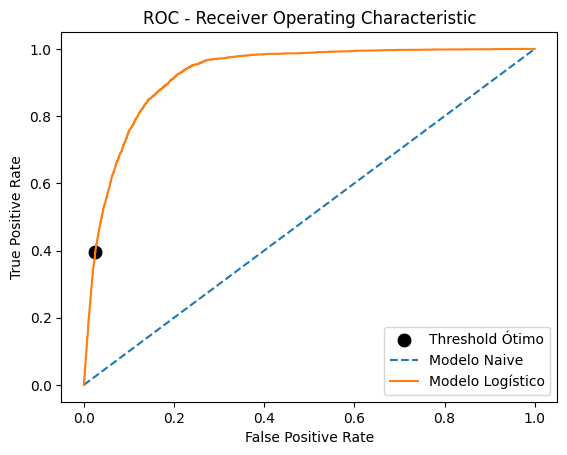

In [40]:
i = np.arange(len(tpr))
df_thresholds = pd.DataFrame({'fpr' : pd.Series(fpr, index = i),
                          'tpr' : pd.Series(tpr, index = i), # sensibilidade
                          '1-fpr' : pd.Series(1-fpr, index = i), # especificidade
                          'J' : pd.Series(tpr + (1 - fpr) - 1, index = i), # sensibilidade + especificidade -1
                          'threshold' : pd.Series(thresholds, index = i)}) # thresholds testados

df_thresholds = df_thresholds.sort_values(by = "J", ascending = False)
corte = df_thresholds.iloc[0]["J"]
print("O threshold ótimo é de: ", round(corte, 3))

# Criando Curva ROC
y_pred_proba = modelo.predict_proba(X_train)[::,1] # Probabilidade de Y = 1 
fpr, tpr, thresholds = roc_curve(y_train,  y_pred_proba)

plt.scatter(df_thresholds.iloc[0]["fpr"], df_thresholds.iloc[0]["tpr"], marker = 'o', color='black', label='Threshold Ótimo', linewidth = 4)
plt.plot([0,1], [0,1], linestyle = '--', label = 'Modelo Naive')
plt.plot(fpr, tpr, label = 'Modelo Logístico')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC - Receiver Operating Characteristic")
plt.legend()
plt.show()

# Resultados e Discussões

(preencher com análises)

##### Variáveis mais relevantes

In [41]:
# Coeficientes do Modelo (variáveis mais relevantes)
coefs = []
for i in range(len(modelo.feature_names_in_)): 
    coefs.append([list(modelo.feature_names_in_)[i], round(modelo.coef_[0][i], 4)])

coefs = pd.DataFrame(coefs, columns=["Variável", "Coeficiente"]).sort_values(by="Coeficiente", ascending=False)

coefs.head(3) # Maiores coeficientes
#coefs.tail(3) # Menores coeficientes

,Variável,Coeficiente
8,CPI,0.4989
6,resultado_anterior,0.3240
5,contatos_anteriores,0.1619


##### Distribuição das Previsões

In [42]:
# Probabilidades de que Y=1 para cada observação do teste (printar gráfico)
y_pred_proba

array([0.01773693, 0.01466012, 0.999478  , ..., 0.75790756, 0.01107901,
       0.09009683])

##### Aprimorando o Modelo

É possível aprimorar o modelo utilizando diversas técnicas para realizar sua otimização de maneira cada vez menos enviesada. Nesse exemplo, vamos demonstrar a aplicação da validação cruzada e da regularização do tipo L2.

* **Validação Cruzada (cross-validation):** Dividimos a base de dados em k subconjuntos. A ideia é de que sejam estimados k modelos diferentes e as métricas de avaliação do modelo final sejam calculadas como uma média simples das métricas obtidas para cada modelo. O modelo final pode ser ajustado em cima de todo o conjunto de dados. Essa estratégia é cara computacionalmente, por isso é aplicada preferencialmente em conjuntos de dados pequenos.

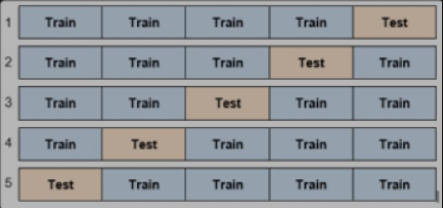

* **Regularização:** É um tipo de técnica utilizada para reduzir a variância dos modelos de machine learning, ou seja, reduzir sua sensibilidade aos dados de treinamento, e melhorando seu desempenho ao prever os dados de teste. A particularidade da regularização L2 consiste em permitir reduzir todos os coeficientes da regressão em uma mesma proporção, de forma assintótica em torno do zero. Em grosso modo, pode-se dizer que todos os coeficientes são reduzidos com base em seu valor relativo aos demais, e assim eliminando os menos relevantes que podem gerar ruídos indesejados.

In [43]:
# novo modelo com cross-validation e regularização L2 maximizando ROC-AUC
from sklearn.linear_model import LogisticRegressionCV
modelo_cv = LogisticRegressionCV(cv=5, scoring="roc_auc")
modelo_cv.fit(X_train, y_train)
y_pred_cv = modelo_cv.predict(X_test)

# Matriz de Confusão
print("----------------------------------------------------------------------------")
print("Matriz de Confusão")
print(confusion_matrix(y_test, y_pred_cv), "\n")

# Métricas de Avaliação
print("----------------------------------------------------------------------------")
print("Relatório de Métricas")
print(classification_report(y_test, y_pred_cv, digits=4))

# Calculando a AUC (Area Under the Curve)
print("----------------------------------------------------------------------------")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_cv)
roc_auc = auc(fpr, tpr)

print("AUC - Teste :", round(roc_auc, 4))

----------------------------------------------------------------------------
Matriz de Confusão
[[6635  157]
 [ 508  349]] 

----------------------------------------------------------------------------
Relatório de Métricas
              precision    recall  f1-score   support

           0     0.9289    0.9769    0.9523      6792
           1     0.6897    0.4072    0.5121       857

    accuracy                         0.9131      7649
   macro avg     0.8093    0.6921    0.7322      7649
weighted avg     0.9021    0.9131    0.9030      7649

----------------------------------------------------------------------------
AUC - Teste : 0.6921


Nota-se que os resultados obtidos foram aprimorados, entretanto o tempo de estimação do modelo aumentou de 0.5s para 10s.